In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

from sklearn.preprocessing import StandardScaler

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)


2.2.0
sys.version_info(major=3, minor=7, micro=7, releaselevel='final', serial=0)
matplotlib 3.1.3
numpy 1.21.5
pandas 1.3.5
sklearn 1.0.2
tensorflow 2.2.0
tensorflow.keras 2.3.0-tf


In [12]:
# fog_dataset_hdf = "H:/github/python/seafog/data/collection/fog_dataset.hdf"
# fog_dataset_hdf = "F:/github/pythonScript/seafog/data/collection/fog_dataset.hdf"
fog_dataset_hdf = "F:/github/pythonScript/seafog/data/collection/extend/fog_dataset_extend.hdf"
store_dataset = pd.HDFStore(fog_dataset_hdf, mode='r')
print(store_dataset.keys())
df_train = store_dataset.get('train')
df_valid =store_dataset.get('valid')
df_test = store_dataset.get('test')

x_columns = ['v100', 'v10m', 'u100', 'u10m', 't2mm', 't2md', 'sstk','year_sin','year_cos', 'day_sin', 'day_cos','fc_hour',]
x_len = len(x_columns)
df_train_x = df_train.loc[:, x_columns]
df_train_y = df_train['station_vis_linear']

df_valid_x = df_valid.loc[:, x_columns]
df_valid_y = df_valid['station_vis_linear']

df_test_x = df_test.loc[:, x_columns]
df_test_y = df_test['station_vis_linear']

train_x = df_train_x.to_numpy()
train_y = df_train_y.to_numpy()

valid_x = df_valid_x.to_numpy()
valid_y = df_valid_y.to_numpy()

test_x = df_test_x.to_numpy()
test_y = df_test_y.to_numpy()

print(train_x.shape)
print(train_y.shape)


['/test', '/train', '/valid']
(63311, 12)
(63311,)


In [13]:
scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x)
valid_x_scaled = scaler.fit_transform(valid_x)
test_x_scaled = scaler.fit_transform(test_x)

In [14]:
print(np.max(train_x_scaled), np.min(train_x_scaled))

6.4529692627123 -6.060409669500032


In [29]:
# tf.keras.models.Sequential()

model = keras.models.Sequential()
model.add(keras.layers.Dense(30, activation='selu',
                       input_shape=train_x_scaled.shape[1:]))
for _ in range(10):
    model.add(keras.layers.Dense(30, activation="selu"))
for _ in range(3):
    model.add(keras.layers.Dense(30, activation="selu"))
    model.add(keras.layers.AlphaDropout(rate=0.5))

model.add(keras.layers.Dense(6, activation="relu"))
model.add(keras.layers.Dense(1))

'''
model = keras.models.Sequential([
     keras.layers.Dense(30, activation='relu',
                        input_shape=train_x_scaled.shape[1:]),
     keras.layers.Dense(6, activation='relu'),
     keras.layers.Dense(1),
])
'''

# relu: y = max(0, x)
# softmax: 将向量变成概率分布. x = [x1, x2, x3], 
#          y = [e^x1/sum, e^x2/sum, e^x3/sum], sum = e^x1 + e^x2 + e^x3

# reason for sparse: y->index. y->one_hot->[] 
model.compile(loss="mean_squared_error", optimizer="sgd")

In [16]:
model.layers

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 30)                390       
_________________________________________________________________
dense_45 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_46 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_47 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_48 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_49 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_50 (Dense)             (None, 30)               

In [ ]:
# [None, 784] * W + b -> [None, 300] W.shape [784, 300], b = [300]

In [30]:
# H:/github/python/seafog/
logdir = './callbacks_reg_dnn'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir, "sea_fog_reg_dnn_model.h5")

model_callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file, save_best_only = True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-4),
    ]
history = model.fit(train_x_scaled, train_y, epochs=100,
                    validation_data=(valid_x_scaled, valid_y),
                    # callbacks = model_callbacks,
                    )

Epoch 1/100
1979/1979 [==============================] - 8s 4ms/step - loss: 0.5021 - val_loss: 6.2447
Epoch 2/100
1979/1979 [==============================] - 8s 4ms/step - loss: 0.3005 - val_loss: 4.9456
Epoch 3/100
1979/1979 [==============================] - 8s 4ms/step - loss: 0.2916 - val_loss: 4.0813
Epoch 4/100
1979/1979 [==============================] - 7s 4ms/step - loss: 0.2656 - val_loss: 3.5895
Epoch 5/100
1979/1979 [==============================] - 7s 4ms/step - loss: 0.2320 - val_loss: 5.2534
Epoch 6/100
1979/1979 [==============================] - 7s 4ms/step - loss: 0.2217 - val_loss: 6.3733
Epoch 7/100
1979/1979 [==============================] - 8s 4ms/step - loss: 0.2201 - val_loss: 3.5795
Epoch 8/100
1979/1979 [==============================] - 8s 4ms/step - loss: 0.2072 - val_loss: 2.6705
Epoch 9/100
1979/1979 [==============================] - 8s 4ms/step - loss: 0.2068 - val_loss: 3.8497
Epoch 10/100
1979/1979 [==============================] - 7s 4ms/step - l

In [ ]:
type(history)

In [ ]:
history.history

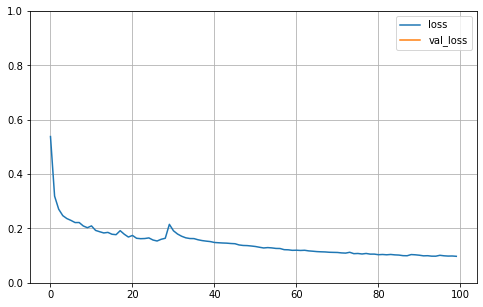

In [24]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)

In [25]:
model.evaluate(test_x_scaled, test_y, verbose=0)

4.56217098236084

In [26]:
predictions = model(test_x_scaled).numpy()
predictions

array([[0.2108603],
       [0.2108603],
       [0.2108603],
       ...,
       [4.980668 ],
       [5.8095527],
       [5.5129027]], dtype=float32)

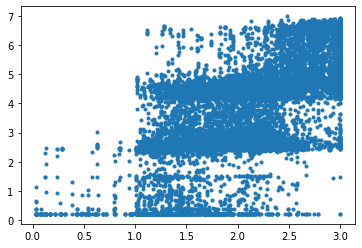

In [27]:
plt.plot(test_y, predictions,'.')
plt.show()

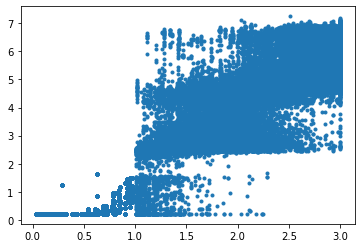

In [28]:
plt.plot(train_y,model(train_x_scaled).numpy(),'.')
plt.show()

In [ ]:
plt.plot(df_train['station_vis'].values,train_y,'.')
plt.show()

In [ ]:
p_test = tf.nn.softmax(predictions).numpy()



In [ ]:
p_test[:,0]

In [ ]:
df_p_test = pd.DataFrame({'p_fog':p_test[:,0],'p_mist':p_test[:,1],'p_clear':p_test[:,2]})

In [ ]:
df_p_test['p_clear'].plot()
df_p_test['p_mist'].plot()
df_p_test['p_fog'].plot()

In [ ]:

df_test_result = df_test.join(df_p_test) 
print(df_test_result.head())
df_test_result.to_csv('df_test_result.csv')

In [ ]:
# 各类别预测准确性对比
# 筛选出不同类别 df_all.loc[df_all['station_vis_cat'] == 2]
# 计算输出的类别 